In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
import numpy as np


In [12]:
start = '2020-01-01'
end = '2022-01-01'

In [13]:
data = yf.download(['BTC-USD', 'BNB-USD', 'XRP-USD', 'ETH-USD', 'ADA-USD', 'DOGE-USD'], start= start, end= end)

[*********************100%***********************]  6 of 6 completed


In [14]:
df = data.Close['ETH-USD'].copy()

In [15]:
df = pd.DataFrame(df)

In [16]:
df['1month_ret'] = df.pct_change(30).shift(-30)

In [17]:

df = df.dropna(thresh=1)  ## drop if data<1 col

df = df.rename(columns= {'ETH-USD': 'close'})

In [18]:
rsi = df.ta.rsi(length= 14, append= True)
ma_cross = df.ta.ma_cross(fast= 5, slow= 20, ma_type= 'ema', append= True)
macd = df.ta.macd(append= True)
#df.ta.ma_obv(fast= 20, slow= 40, ma_type= 'ema', append= True)

AttributeError: 'AnalysisIndicators' object has no attribute 'ma_cross'

In [ ]:
df.loc[df[f'{ma_cross.name}'] > 0 , 'ma_cross'] = 1
df.loc[df[f'{ma_cross.name}'] < 0 , 'ma_cross'] = 0


In [10]:
### encoded y to binary
df.loc[df['1month_ret'] > 0, '1m_profit'] = 1 
df.loc[df['1month_ret'] < 0, '1m_profit'] = 0

In [151]:
m_ret = df.pop('1month_ret')

In [117]:
#df.insert(len(df.columns), '1month_ret', m_ret)

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [ ]:
#### 1st run with raw dataset, no labeled no scaled
#### try to see feature impotance

In [172]:
X = df.iloc[:-30, 1:-1]
y = df.iloc[:-30, -1]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 40)

In [173]:
X.columns

Index(['RSI_14', 'MAe_5', 'MAe_20', 'MAe_5_20_diff', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'ma_cross'],
      dtype='object')

In [218]:
model = Sequential()

model.add(Input(shape= 8))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

opt = Adam(learning_rate= 0.001)
model.compile(
    optimizer= opt,
    loss= 'binary_crossentropy',
    metrics= ['accuracy']
)


In [215]:
history = model.fit(X_train, y_train, epochs= 2, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/2
57/57 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2888 - val_loss: nan - val_accuracy: 0.2624
Epoch 2/2
57/57 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2888 - val_loss: nan - val_accuracy: 0.2624


In [219]:
score = model.evaluate(X_test, y_test)#, verbose=0) 
score[1]  ### 1 is acc

5/5 [==============================] - 0s 748us/step - loss: nan - accuracy: 0.6738


0.673758864402771

In [221]:
y_pred = model.predict(X_test)
acc = sum([np.argmax(y_test[i])==np.argmax(y_pred[i]) for i in range(141)])/141
acc

1.0

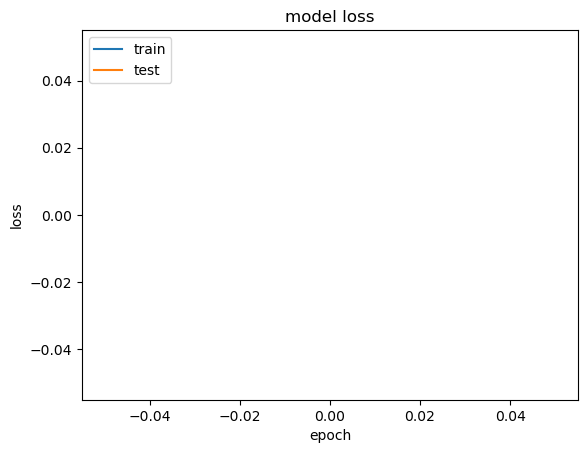

In [200]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

In [201]:
h1 = pd.DataFrame(history.history)

In [202]:
h1

,loss,accuracy,val_loss,val_accuracy
0,NaN,0.294643,NaN,0.265487
1,NaN,0.294643,NaN,0.265487
2,NaN,0.294643,NaN,0.265487
3,NaN,0.294643,NaN,0.265487
4,NaN,0.294643,NaN,0.265487
...,...,...,...,...
95,NaN,0.294643,NaN,0.265487
96,NaN,0.294643,NaN,0.265487
97,NaN,0.294643,NaN,0.265487
98,NaN,0.294643,NaN,0.265487
